In [47]:
import pandas as pd
import numpy as np

# a) Generate a Dataset

*Randomly generate a dataset (dataframe) with eight columns and 50,000 rows. Each column should be a categorical variable (of arbitrary name) with three levels (of arbitrary names) in approximately equal proportions.*

## i. Random Generation

In [48]:
examples=50000
features=8
num_categories=3

#Encode each of the three categories as integers
#Generate random floats from 0-1. Multiply by num_categories to get random numbers over the right range, then round down to get integers.
rand_arr = np.floor(np.random.rand(examples,features)*num_categories).astype(int)
rand_arr

array([[2, 0, 0, ..., 0, 0, 2],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 2, 2],
       ...,
       [1, 0, 0, ..., 0, 2, 0],
       [0, 1, 2, ..., 0, 1, 0],
       [2, 2, 2, ..., 1, 1, 2]])

## ii. Convert to a Pandas Dataframe

In [49]:
df = pd.DataFrame(rand_arr)

#Rename the columns for clarity
col_numbers = range(0,8)
col_names = [f"Column {col}" for col in col_numbers]
#generate a dictionary of column numbers and names to pass to the dataframe rename method
columns_rename = {number:name for (number,name) in zip(col_numbers, col_names)}
df.rename(columns=columns_rename, inplace=True)

df


,Column 0,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6,Column 7
0,2,0,0,1,1,0,0,2
1,0,1,1,1,0,0,0,0
2,0,0,2,2,2,0,2,2
3,0,0,0,0,1,2,2,0
4,2,2,2,2,0,2,0,2
...,...,...,...,...,...,...,...,...
49995,1,0,0,0,1,1,1,2
49996,2,2,1,2,0,2,2,2
49997,1,0,0,2,0,0,2,0
49998,0,1,2,0,2,0,1,0


# b) Verify Distribution

*Verify that the proportions of each value are similar for each of the eight columns.*

In [50]:
df_counts = pd.DataFrame()

#for each of the integer encoded labels, create a series with the number of instances of that label for each column and append that to a new dataframe
for val in range(0,num_categories):
    df_counts = df_counts.append(df[df == val].count(), ignore_index=True)

df_counts.index.set_names('Category Label', inplace=True)
print("Count of Category Labels by Column:")
df_counts

Count of Category Labels by Column:


,Column 0,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6,Column 7
Category Label,,,,,,,,
0,16569.0,16763.0,16695.0,16877.0,16816.0,16639.0,16777.0,16460.0
1,16664.0,16613.0,16513.0,16449.0,16485.0,16697.0,16731.0,16714.0
2,16767.0,16624.0,16792.0,16674.0,16699.0,16664.0,16492.0,16826.0


The proptions look similar from the table, but we can plot these against a normal distribution to be sure.

Text(0, 0.5, 'Probability Density')

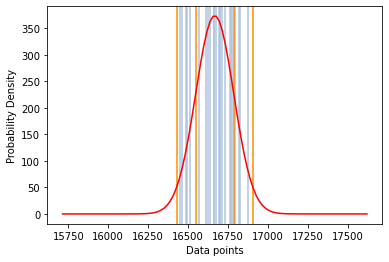

In [59]:
import matplotlib.pyplot as plt

# create a vector of all the counts
arr_counts = np.reshape(df_counts.to_numpy(),8*3)

#Creating a Function.
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density
 
#Calculate mean and Standard deviation.
mean = np.mean(arr_counts)
sd = np.std(arr_counts)

#Create normal distribution data points
x = np.linspace(mean-8*sd,mean+8*sd,100)
pdf = normal_dist(x,mean,sd)

x_max = 250
#draw real datapoints
for i in arr_counts:
    plt.axline((i, 0), (i, x_max), color="lightsteelblue")

# draw 1 and 2 sd
for i in range(1,3):
    for j in [-1,1]:
        plt.axline((mean+(j*i*sd), 0), (mean+(j*i*sd), x_max), color="darkorange")

# plot distribution
plt.plot(x, pdf, color = 'red')
plt.xlabel('Data points')
plt.ylabel('Probability Density')

- Red: Normal distribution with mean and standard deviation from this data
- Orange: 1st and 2nd standard deviation
- Blue: Real data

Most of the counts fall within one standard deviation, all fall within two.

# C) Unique Combinations

*How many unique rows (i.e., permutations of category levels) are possible?*

In [53]:
possible_permutations = num_categories**features
print("There are {:,} unique permutations.".format(possible_permutations))

There are 6,561 unique permutations.


# d) Permutation Frequency

*Produce a table and appropriate graph which show the frequencies (numbers of groups) by permutation group sizes up to group size of 12. That is, how many groups are unique combinations (group size = 1), how many groups are made up of a pair of matching combinations (group size = 2), how many groups are made up three the same, etc?*


## i. Create Table

Count the number of instances of each permutation:

In [54]:
s_perm_frequency = df.pivot_table(index=col_names, aggfunc='size').rename("Count")
s_perm_frequency


Column 0  Column 1  Column 2  Column 3  Column 4  Column 5  Column 6  Column 7
0         0         0         0         0         0         0         0            5
                                                                      1           14
                                                                      2            8
                                                            1         0            7
                                                                      1            7
                                                                                  ..
2         2         2         2         2         2         1         1            5
                                                                      2            7
                                                            2         0            9
                                                                      1            4
                                                                      2

Group by the permutation count and count the size of the groups:

In [55]:
#count
s_permutation_count = s_perm_frequency.value_counts().sort_index()
#convert to dataframe
df_permutation_count = s_permutation_count.to_frame()
#name the index
df_permutation_count.index.set_names("Group Size", inplace=True)
# Cut off after group size of 12
max_group_size = 12
df_permutation_count = df_permutation_count.loc[df_permutation_count.index <= max_group_size]
df_permutation_count

,Count
Group Size,
1,25
2,77
3,255
4,437
5,715
6,860
7,974
8,911
9,760


## ii. Plot

In [56]:
import plotly.express as px

px.line(df_permutation_count.reset_index(), x = "Group Size", y = "Count", title="Unique Permuations")

# e) Distribution

*Comment Upon the Distribution of Group Sizes in d)*

The group sizes appear to be normally distributed, which is what would be expected from randomly generated data.

# f) Privacy Implications

*If your random variables were, in fact, meaningful information on individuals, which group sizes are of most concern from a privacy perspective?*

Assuming that the individual category labels are not personally identifying, privacy would become a concern when combinations of these anonymous pieces of information become identifying. Therefore it is the small group sizes in the above dataset that would be of concern.

For example, if this were an equality monitoring survey (which should be completely anonymous) conducted in a work place: if we had some prior information on the employees, we may be able to identify the survey responses of a target individual and have access to what should be anonymous information about them. This is clearly undesirable from a privacy perspective. The smaller the group size, the fewer pieces of prior information we need to identify individuals. 

# g) Missing Data

*Consider the effect of missing data in the dataset you created in Part a).  How might this complicate the production of a frequency table of group sizes in Part d)?*

If we ignore missing data (pandas would do this by default in the value_counts method that produces the frequency table), this would have the effect of shifting the frequency graph to the left and reducing the average group size: the data would become less anonymous. 

However, that is probably the wrong approach. For anonymity purposes, we should treat missing data as an extra category label. This increases the number of possible permutations, the average group size would decrease and the data would be less anonymous. The change would depend on how much data is missing, but in our current example, if the amount of missing data is weighted as equally as our 3 labels across all 8 columns, the number of possible permutations would increase by a factor of 8 and have a dramatic effect on the group size and level of anonymity. 

If the data had correlations between columns, it might be possible to impute the missing values which would help to anonymise the data. This should only be used if the data is missing at random, it would not help if there are systematic reasons for the missing data.

# h) Deployment

*Imagine the code that you wrote for Part d) was to be deployed in an automated system that Mirador’s customers could use independently, on potentially large volumes of their own data. Describe how you might deploy the code, and what additional considerations you might have or any changes to the code you might make.*

- Deployment:
    - Cloud compute such as AWS EC2
    - Cloud storage such as AWS RDS or dynamoDB

- Other considerations:
    - Would need to consider the approach to missing data in respect to g)

- Changes to code:
    - Code is already flexible: can account for any number of columns, examples, or categories
    - Migrate from jupyter notebook to python file, turn code segments into a class/classes and create an importable python module.
    - Would need to add an integer encoding step for categorical labels for real data
    - Group size cutoff: currently manually specified, could maybe be calculated from the distribution to account for different datasets (e.g. mean +2 standard deviations).



